In [2]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib.colors import to_rgba, LinearSegmentedColormap

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import seaborn as sns

from mplsoccer.pitch import Pitch

from PIL import Image

import os

from urllib.request import urlopen
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

from scipy.ndimage import gaussian_filter


In [3]:
parser = Sbopen()
match_files = [3835337, 3835329, 3835322]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [4]:
lineup = sb.lineups(match_id=3835337)

In [5]:
im = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [6]:
teamName = "Denmark Women's"
tournament = "Women's EURO 2022"
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
hteamSecColor = "#FFFFFF"
textColor = "black"
MVP = 10108

In [7]:
dfTeam = df[df["team_name"]== teamName]

In [8]:
xgTeam = dfTeam["shot_statsbomb_xg"].sum()
xgTeam = str(round(xgTeam, 2))

In [9]:
shots = dfTeam[dfTeam["type_name"]== "Shot"]
shots = shots[shots["outcome_name"]!= "Goal"]
shots = shots[['team_name', 'player_name', "match_id", 'minute', 'second', "x", "y",
                       'shot_statsbomb_xg', "type_name", "outcome_name"]]

goals = dfTeam[dfTeam["outcome_name"] == "Goal"]
goals = goals[['team_name', 'player_name', "match_id", 'minute', 'second', "x", "y",
                       'shot_statsbomb_xg', "type_name", "outcome_name"]]

countGoals = goals.shape[0]
countShots = (shots.shape[0]+goals.shape[0])


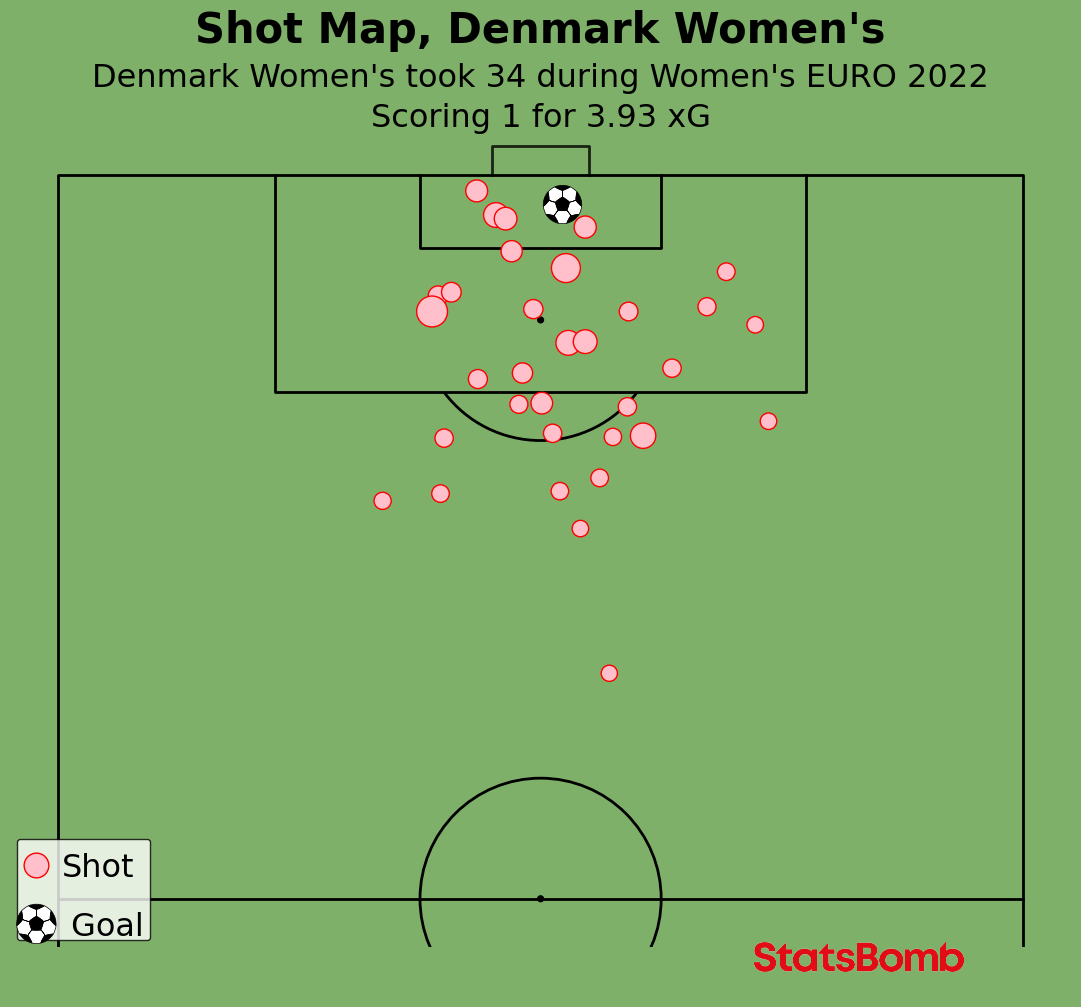

In [10]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8,
                      pitch_color=pitchColor, line_color=linesColor)

fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, 
                    axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor(figColor)



scatter_teamShots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 130, 
                              c='pink', edgecolors= "red", marker='o', 
                              alpha = 1, ax=axs['pitch'], label = "Shot")
scatter_teamGoals = pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 130, 
                              c='white', edgecolors= "black", marker='football', 
                              alpha = 1, ax=axs['pitch'], label= " Goal")



axs["title"].text (0.5, 1.2, (f"Shot Map, {teamName}"), color=textColor, 
                   va="center", ha="center", fontsize=30, fontweight="bold")
axs["title"].text (0.5, 0.6, (f"{teamName} took {countShots} during {tournament}"), color=textColor,
                   va="center", ha="center", fontsize=23)
axs["title"].text (0.5, 0.1, (f"Scoring {countGoals} for {xgTeam} xG"), color=textColor,
                   va="center", ha="center", fontsize=23)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

legend = axs['pitch'].legend(loc='lower left', facecolor="white", edgecolor="black", labelspacing=2)
for text in legend.get_texts():
    text.set_fontsize(23)
    text.set_va('center')

#plt.savefig(f'viz/Shotmap for {teamName} In {tournament}', dpi=300, bbox_inches='tight')

In [11]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)

In [12]:
robotto_regular = FontManager()
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

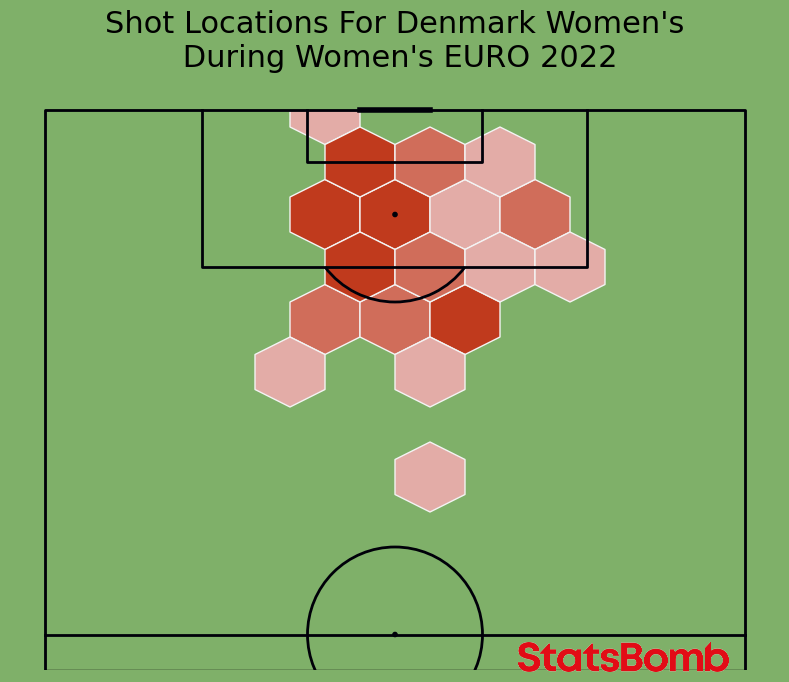

In [13]:
pitch = VerticalPitch(line_color='#000009',half=True, line_zorder=2, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(8, 10))
fig.set_facecolor(pitchColor)

hexmap = pitch.hexbin(shots.x, shots.y, ax=ax, edgecolors='#f4f4f4',
                      gridsize=(10, 10), cmap=flamingo_cmap)

ax.set_title(f"Shot Locations For {teamName}\n During {tournament}", 
             fontsize=22, color=textColor)

ax3 = fig.add_axes([0.65, 0.20, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Shot Locations for {teamName} In {tournament}, Hexgrid', dpi=300, bbox_inches='tight')

In [14]:
crosses = dfTeam[dfTeam["pass_cross"]== True]
crosses = crosses[crosses["outcome_name"]!= "Incomplete"]
crosses = crosses[crosses["outcome_name"]!= "Out"]
crosses = crosses[['team_name', 'player_name', 'minute', 'second', "x", "y","end_x", "end_y", "outcome_name", 
                   "match_id", "play_pattern_name"]]

countCrosses = crosses.shape[0]

crossesOpenplay = crosses[crosses["play_pattern_name"]=="Regular Play"]
crossesSetpieces = crosses[crosses["play_pattern_name"]!="Regular Play"]

countOpenplay = crossesOpenplay.shape[0]
countSetpieces = crossesSetpieces.shape[0]

In [15]:
incompleteCrosses = dfTeam[dfTeam["pass_cross"]== True]
incompleteCrosses = incompleteCrosses[incompleteCrosses["outcome_name"].notnull()]


incompleteCrosses = incompleteCrosses[['team_name', 'player_name', 'minute', 'second', 
                                       "x", "y","end_x", "end_y", "outcome_name", 
                   "match_id", "play_pattern_name"]]

countIncomplete = incompleteCrosses.shape[0]

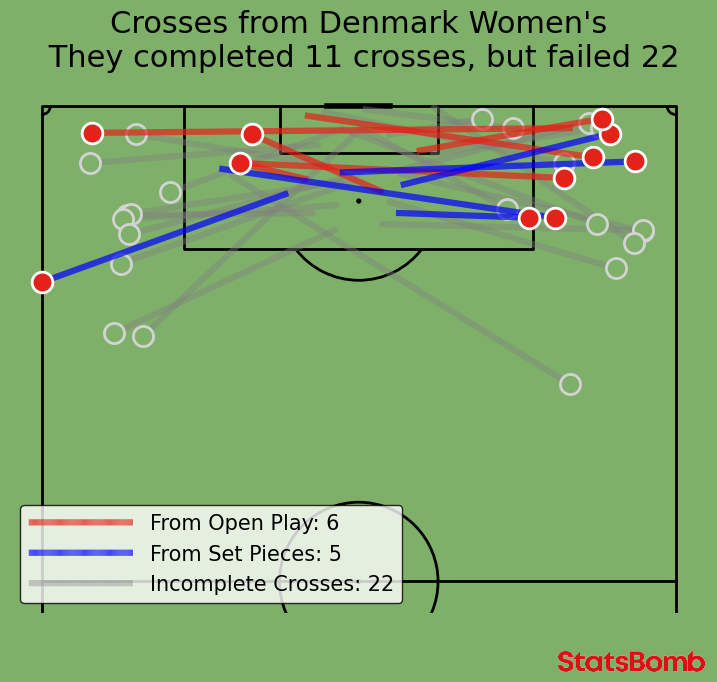

In [16]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, 
                      half=True, corner_arcs=True, goal_type="line")
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


crosses_start = pitch.scatter(crosses.x, crosses.y,
                           s=222,color=hteamColor, edgecolors=hteamSecColor, linewidth=2, alpha=1, ax=ax, zorder=4)

OpenPlay = pitch.lines(crossesOpenplay.x, crossesOpenplay.y,
                  crossesOpenplay.end_x, crossesOpenplay.end_y, lw=4.5, color=hteamColor, ax=ax, zorder=3, 
                       alpha=.70, label=f"From Open Play: {countOpenplay}")

SetPiece = pitch.lines(crossesSetpieces.x, crossesSetpieces.y,
                  crossesSetpieces.end_x, crossesSetpieces.end_y, lw=4.5, color="blue", ax=ax, zorder=3, 
                       alpha=.70, label=f"From Set Pieces: {countSetpieces}")
incompleteCrosses_start = pitch.scatter(incompleteCrosses.x, incompleteCrosses.y,
                           s=210,color=pitchColor, edgecolors="lightgrey", linewidth=2, alpha=1, ax=ax, zorder=2)

IncompleteCrosses = pitch.lines(incompleteCrosses.x, incompleteCrosses.y,
                  incompleteCrosses.end_x, incompleteCrosses.end_y, lw=4.5, color="grey", ax=ax, zorder=1, 
                       alpha=.40, label =f"Incomplete Crosses: {countIncomplete}")

ax.set_title(f"Crosses from {teamName}\n They completed {countCrosses} crosses, but failed {countIncomplete}", 
             fontsize=22, color=textColor)

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=15, loc='lower left')

ax3 = fig.add_axes([0.65, 0.026, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Crosses From {teamName} In {tournament}', dpi=300, bbox_inches='tight')

In [17]:
pressure = (df.team_name == teamName) & (df.type_name == "Pressure")
df = df.loc[pressure, ["x", "y"]]

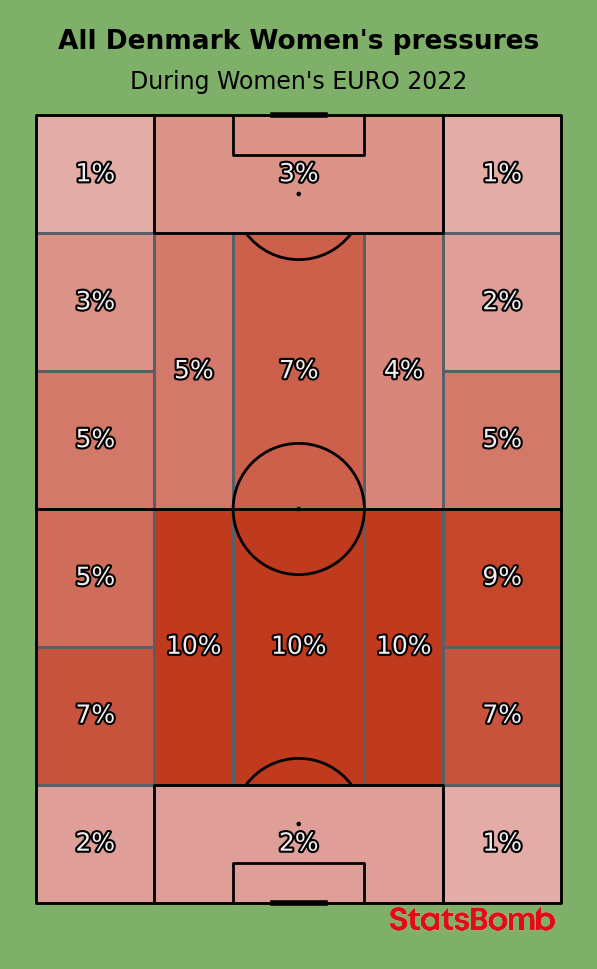

In [18]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color=pitchColor, line_color="black")
fig, axs = pitch.grid(figheight=10, endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor(pitchColor)

bin_statistic = pitch.bin_statistic_positional(df.x, df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=flamingo_cmap, edgecolors='#576066')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs["title"].text (0.5, 0.6, (f"All {teamName} pressures"), color=textColor, 
                   va="center", ha="center", fontsize=19, fontweight="bold")
axs["title"].text (0.5, 0.1, (f"During {tournament}"), color=textColor, 
                   va="center", ha="center", fontsize=17)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pressures From {teamName} In {tournament}', dpi=300, bbox_inches='tight')

In [19]:
passes = dfTeam[dfTeam["type_name"]== "Pass"]
passes = passes[(passes["outcome_name"]!="Kick Off") & (passes["outcome_name"]!="Goal Kick") 
                    & (passes["outcome_name"]!="Free Kick") & (passes["outcome_name"]!="Throw-in") 
                    & (passes["outcome_name"]!="Corner") ]
passes = passes[['team_name', 'player_name',"player_id", 'minute', 'second', "x", "y", "end_x", "end_y",
                       "type_name", "outcome_name"]]

passes = passes.reset_index()

In [23]:
xT = pd.read_csv("xT_grid.csv", header=None)
xT = np.array(xT)

In [24]:
xT_rows, xT_cols = xT.shape

In [25]:
passes["x1_bin"] =pd.cut(passes["x"], bins =xT_cols, labels=False)
passes["y1_bin"] =pd.cut(passes["y"], bins =xT_rows, labels=False)
passes["x2_bin"] =pd.cut(passes["end_x"], bins =xT_cols, labels=False)
passes["y2_bin"] =pd.cut(passes["end_y"], bins =xT_rows, labels=False)

In [26]:
passes["start_zone_value"] = passes[["x1_bin", "y1_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)
passes["end_zone_value"] = passes[["x2_bin", "y2_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)

In [27]:
passes["xT"] = passes["end_zone_value"] - passes["start_zone_value"]

In [28]:
agg_xt = (passes.groupby(['player_name', "team_name"]).agg({'xT':'sum'}).reset_index())
agg_xt = agg_xt.sort_values(by =["xT"], ascending =False)
agg_xt = agg_xt.head(5)
agg_xt = agg_xt.reset_index(drop=True)

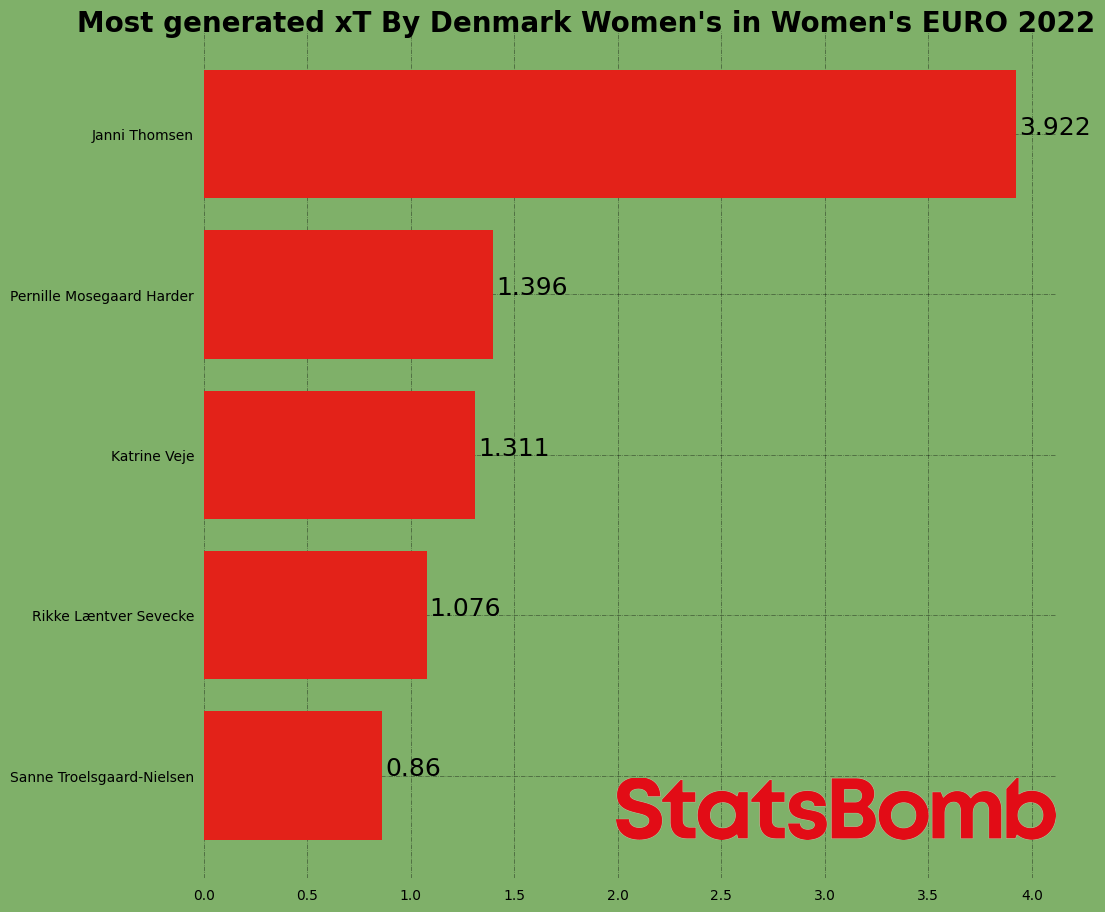

In [29]:
    ### Define labels and metrics
    player = agg_xt['player_name']
    value = agg_xt['xT']

    ### Create figure 
    fig, ax = plt.subplots(figsize =(11, 11))
    fig.set_facecolor(pitchColor)
    ax.patch.set_facecolor(pitchColor)

    ax.grid(visible=True,
            color='black',
            linestyle='-.',
            linewidth=0.5,
            alpha=0.5,
        zorder=1
           )
    
    
    ### Create Horizontal Bar Plot
    bars = ax.barh(player,
                   value,
                   color=hteamColor,
                   alpha=1,
                   zorder=2
                  )


spines = ['top', 'right', 'bottom', 'left']
    for s in spines:
        if s in ['top', 'right', 'bottom', 'left']:
            ax.spines[s].set_visible(False)
        else:
            ax.spines[s].set_color(text_colour)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.invert_yaxis()




for i in ax.patches:
        plt.text(i.get_width()+0.015, i.get_y()+0.4,
                 str(round((i.get_width()), 3)),
                 fontsize=18,
                 fontweight='regular',
                 color ='black')
        
plt.figtext(0.01,
                0.88,
                f'Most generated xT By {teamName} in {tournament}',
                fontsize=20,
                fontweight='bold', 
                color=textColor
               )    
    
ax3 = fig.add_axes([0.50, -0.002, 0.40, 0.35])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/top 5 xT created, {teamName} in {tournament}', dpi=300, bbox_inches='tight')

In [30]:
pass_end = passes[["end_x", "end_y"]]

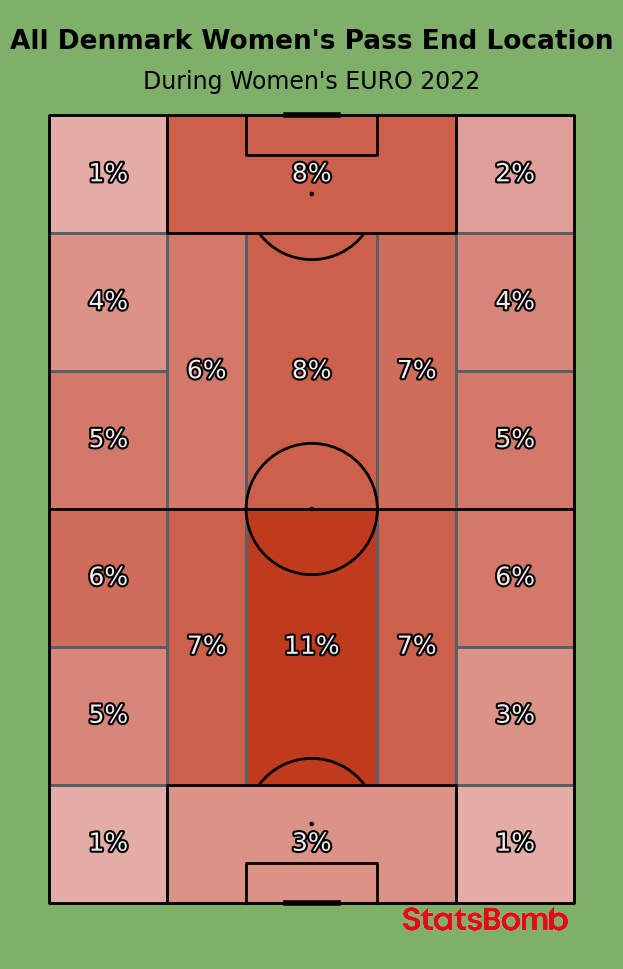

In [31]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color=pitchColor, line_color="black")
fig, axs = pitch.grid(figheight=10, endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor(pitchColor)

bin_statistic = pitch.bin_statistic_positional(pass_end.end_x, pass_end.end_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=flamingo_cmap, edgecolors='#576066')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs["title"].text (0.5, 0.6, (f"All {teamName} Pass End Location"), color=textColor, 
                   va="center", ha="center", fontsize=19, fontweight="bold")
axs["title"].text (0.5, 0.1, (f"During {tournament}"), color=textColor, 
                   va="center", ha="center", fontsize=17)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pass end location From {teamName} In {tournament}', dpi=300, bbox_inches='tight')

In [32]:
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [33]:
progPasses = passes[passes["progressive"]==True]
progPasses = progPasses.sort_values(by=["player_id"])
progPasses = progPasses.reset_index()

In [34]:
carrys = dfTeam[dfTeam["type_name"]== "Carry"]
carrys = carrys[['team_name', 'player_name',"match_id", 'minute', 'second', "x", "y", "end_x", "end_y",
                    "type_name", "outcome_name"]]
carrys = carrys.reset_index()

carrys['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -carrys['y']))
carrys['end'] = np.sqrt(np.square(120 - carrys['end_x']) + np.square(40 - carrys['end_y']))

carrys['progressive'] = [(carrys['end'][x]) / (carrys['beginning'][x]) < .75 for x in range(len(carrys.beginning))]

In [44]:
passesDF = passes.copy()

In [45]:
badPasses = passesDF.dropna()

In [47]:
compPasses = passesDF[passesDF["outcome_name"]!= "Out"]
compPasses = passesDF[passesDF["outcome_name"]!= "Pass Offside"]
compPasses = passesDF[passesDF["outcome_name"]!= "Unknown"]
compPasses = passesDF[passesDF["outcome_name"]!= "Incomplete"]
compPasses = compPasses.fillna("Complete")

In [48]:
badPassesSum = badPasses.groupby("player_name")
badPassesSum = badPassesSum.count().reset_index()
badPassesSum = badPassesSum.drop(badPassesSum.columns[[2, 3, 4,5,6,7,8,9,10,11,12,13,14]], axis=1)
badPassesSum = badPassesSum.rename(columns={'index': 'incomplete',})

In [49]:
compPassSummary = compPasses.groupby("player_name")
compPassSummary = compPassSummary.count().reset_index()
compPassSummary = compPassSummary.drop(compPassSummary.columns[[2, 3, 4,5,6,7,8,9,10,11,12,13,14]], axis=1)
compPassSummary = compPassSummary.rename(columns={'index': 'complete',})

In [50]:
allPassesSummary = compPassSummary.merge(badPassesSum, how='right')

allPassesSummary["total"] = allPassesSummary["complete"] + allPassesSummary["incomplete"]
allPassesSummary["%"] = (allPassesSummary["complete"]/allPassesSummary["total"]*100).round(1)
allPassesSummary["player_name"] = allPassesSummary["player_name"].apply(lambda x: str(x).split()[-1])

allPassesSummary.sort_values("total", ascending=False).head()

,player_name,complete,y2_bin,start_zone_value,end_zone_value,xT,beginning,end,progressive,incomplete,total,%
0,Thomsen,NaN,39,39,39,39,39,39,39,39,NaN,NaN
1,Holmgaard,NaN,18,18,18,18,18,18,18,18,NaN,NaN
2,Kühl,NaN,6,6,6,6,6,6,6,6,NaN,NaN
3,Veje,NaN,40,40,40,40,40,40,40,40,NaN,NaN
4,Christensen,NaN,32,32,32,32,32,32,32,32,NaN,NaN


Text(0.5, 1.0, 'Top 5 Passers')

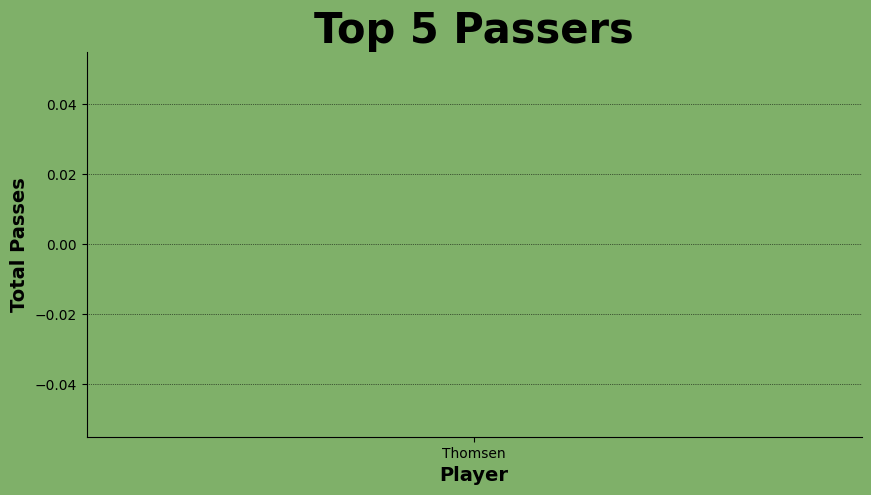

In [51]:
top5df = allPassesSummary.sort_values("total", ascending=False)[0:7]

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(pitchColor)
ax.patch.set_facecolor(pitchColor)

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
ax.grid(ls='dotted',lw=.5,color='black',axis='y',zorder=1)

    
plt.bar(top5df["player_name"], top5df["total"], color=hteamColor, width=.5)
plt.xlabel("Player", fontsize=14, fontweight="bold")
plt.ylabel("Total Passes", fontsize=14, fontweight="bold")
plt.title("Top 5 Passers", fontsize=30, fontweight="bold")

#plt.savefig(f'viz/Top 5 Passers {teamName} In {tournament}', dpi=300, bbox_inches='tight')

In [52]:
dkxG =  dfTeam[dfTeam["shot_statsbomb_xg"]> .01]
dkxG = dkxG[['player_name',"shot_statsbomb_xg"]]

In [53]:
xGSum = dkxG.groupby("player_name").sum()
xGSum = xGSum.rename(columns={'shot_statsbomb_xg': 'xG'}).reset_index()
xGSum.sort_values("xG", ascending=False)

,player_name,xG
5,Pernille Mosegaard Harder,1.089551
4,Nadia Nadim,0.879540
1,Karen Holmgaard,0.653633
12,Stine Larsen,0.208678
3,Katrine Veje,0.179123
10,Signe Kallesøe Bruun,0.175084
6,Rikke Læntver Sevecke,0.151368
0,Janni Thomsen,0.148066
2,Kathrine Møller Kühl,0.135262
7,Rikke Marie Madsen,0.099543


Text(0.5, 1.0, 'Top 5 Xg Creators')

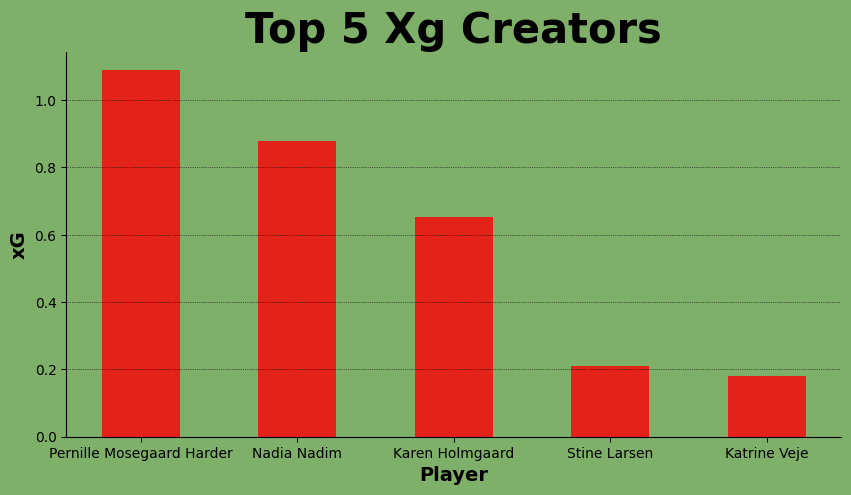

In [54]:
topxg = xGSum.sort_values("xG", ascending=False)[0:5]

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(pitchColor)
ax.patch.set_facecolor(pitchColor)

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
ax.grid(ls='dotted',lw=.5,color='black',axis='y',zorder=1)

    
plt.bar(topxg["player_name"], topxg["xG"], color=hteamColor, width=.5)
plt.xlabel("Player", fontsize=14, fontweight="bold")
plt.ylabel("xG", fontsize=14, fontweight="bold")
plt.title("Top 5 Xg Creators", fontsize=30, fontweight="bold")

#plt.savefig(f'viz/Top 5 xG creators {teamName} In {tournament}', dpi=300, bbox_inches='tight')